In [ ]:
!pip install cufflinks

In [2]:
from helpers import *
import xgboost as xgb
from sklearn.model_selection import train_test_split 
import seaborn as sns

In [60]:
stores = pd.read_csv("data/store.csv")
train = pd.read_csv("data/train.csv")
train.head()

(637774, 9)

In [65]:
#merge stores into train
full_train = pd.merge(train, stores, how="left", on="Store")
full_train.head()

,Year,Quarter,Month,Week,Day,Date,Store,DayOfWeek,Sales,Customers,...,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,2013,1,1,1,1,2013-01-01,1115.0,2.0,0.0,0.0,...,1.0,d,c,5350.0,NaN,NaN,1.0,22.0,2012.0,"Mar,Jun,Sept,Dec"
1,2013,1,1,1,1,2013-01-01,379.0,2.0,0.0,0.0,...,1.0,d,a,6630.0,NaN,NaN,0.0,NaN,NaN,NaN
2,2013,1,1,1,1,2013-01-01,378.0,2.0,0.0,0.0,...,1.0,a,c,2140.0,8.0,2012.0,0.0,NaN,NaN,NaN
3,2013,1,1,1,1,2013-01-01,377.0,2.0,0.0,0.0,...,1.0,a,c,100.0,6.0,2010.0,1.0,18.0,2010.0,"Feb,May,Aug,Nov"
4,2013,1,1,1,1,2013-01-01,376.0,2.0,0.0,0.0,...,1.0,a,a,160.0,8.0,2012.0,0.0,NaN,NaN,NaN


In [66]:
full_train.columns

Index(['Year', 'Quarter', 'Month', 'Week', 'Day', 'Date', 'Store', 'DayOfWeek',
       'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [68]:
full_train.dtypes

Year                                  int64
Quarter                               int64
Month                                 int64
Week                                  int64
Day                                   int64
Date                         datetime64[ns]
Store                               float64
DayOfWeek                           float64
Sales                               float64
Customers                           float64
Open                                float64
Promo                               float64
StateHoliday                         object
SchoolHoliday                       float64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                              float64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                   

In [4]:
# run trial i
X = full_train[['Store', 'DayOfWeek',  'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear']]
y_label = full_train['Sales']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.2, random_state=1)
data_dmatrix = xgb.DMatrix(data=X_train, label=y_train)
xgb_model = xgb.XGBRegressor(random_state=1, objective='reg:squarederror')
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

In [10]:
def metric(preds, actuals):
    preds = preds.reshape(-1)
    actuals = actuals.reshape(-1)
    assert preds.shape == actuals.shape
    return 100 * np.linalg.norm((actuals - preds) / actuals) / np.sqrt(preds.shape[0])

In [11]:
metric(y_pred, y_test.values)

C:\Users\MyLAP\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


inf

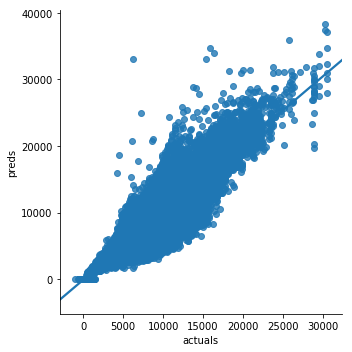

In [15]:
res = pd.DataFrame({ 'actuals' : y_pred,'preds': y_test.values })
sns.lmplot(x="actuals", y="preds", data=res)